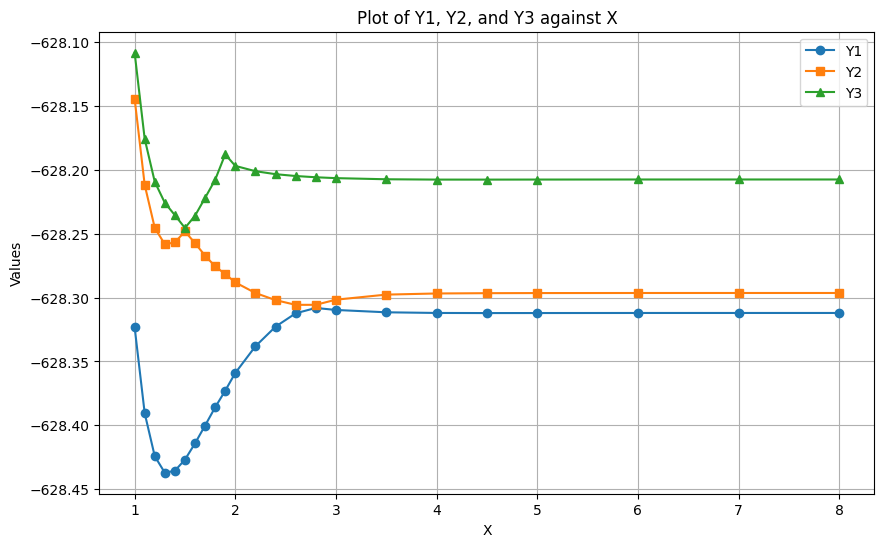

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv("/content/btp_data..csv")

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df["X"], df["Y1"], marker='o', label="Y1")
plt.plot(df["X"], df["Y2"], marker='s', label="Y2")
plt.plot(df["X"], df["Y3"], marker='^', label="Y3")

# Labels and title
plt.xlabel("X")
plt.ylabel("Values")
plt.title("Plot of Y1, Y2, and Y3 against X")
plt.legend()
plt.grid()

# Show the plot
plt.show()

In [ ]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np


In [ ]:
# Load the CSV file
df = pd.read_csv("/content/btp_data..csv")
X = torch.tensor(df["X"].values, dtype=torch.float32).unsqueeze(1)

In [ ]:
df.shape


(23, 5)

In [ ]:
def feature_transform(x, degree):
    poly_features = [x**i for i in range(1, degree + 1)]
    sin_features = [torch.sin(x * i) for i in range(1, degree + 1)]
    cos_features = [torch.cos(x * i) for i in range(1, degree + 1)]
    return torch.cat(poly_features + sin_features + cos_features, dim=1)

DEGREE = 8  # Change polynomial degree if needed
X_transformed = feature_transform(X, DEGREE)


In [ ]:
# Define Regression Model
class RegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel, self).__init__()
        self.fc = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.fc(x)

In [ ]:
def train_model(y):
    y = torch.tensor(y.values, dtype=torch.float32).unsqueeze(1)
    model = RegressionModel(X_transformed.shape[1])
    print("Model Architecture:\n", model)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-4)

    for epoch in tqdm(range(2000), desc="Training Progress"):
        optimizer.zero_grad()
        output = model(X_transformed)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()

    return model

In [ ]:
# Train models for Y1, Y2, and Y3
models = {}
for col in ["Y1", "Y2", "Y3"]:
    print(f"Training model for {col}")
    models[col] = train_model(df[col])

Training model for Y1
Model Architecture:
 RegressionModel(
  (fc): Linear(in_features=24, out_features=1, bias=True)
)


Training Progress: 100%|██████████| 2000/2000 [00:01<00:00, 1407.16it/s]


Training model for Y2
Model Architecture:
 RegressionModel(
  (fc): Linear(in_features=24, out_features=1, bias=True)
)


Training Progress: 100%|██████████| 2000/2000 [00:01<00:00, 1515.83it/s]


Training model for Y3
Model Architecture:
 RegressionModel(
  (fc): Linear(in_features=24, out_features=1, bias=True)
)


Training Progress: 100%|██████████| 2000/2000 [00:01<00:00, 1296.21it/s]


In [ ]:
def save_model_parameters(model, filename):
    with open(filename, "w") as f:
        for name, param in model.named_parameters():
            f.write(f"{name}: {param.data.tolist()}\n")

for col, model in models.items():
    save_model_parameters(model, f"{col}_params.txt")

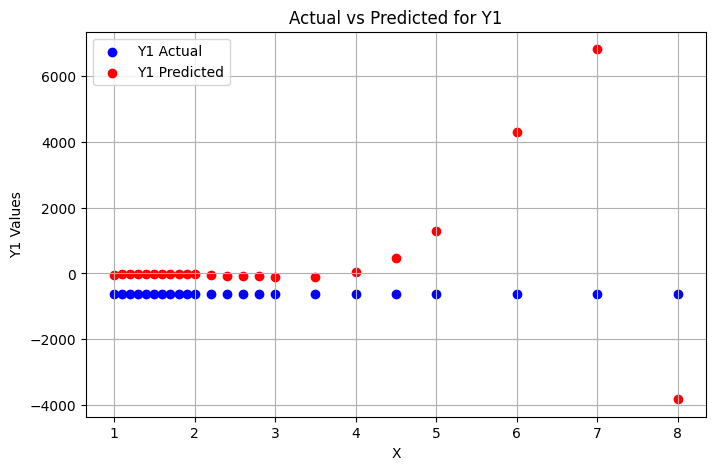

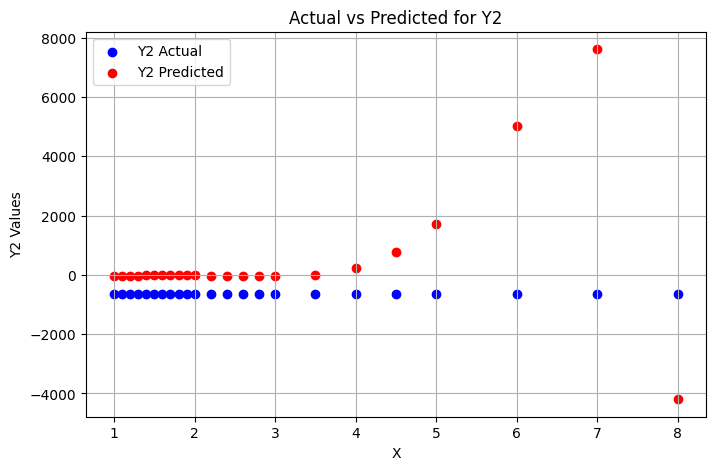

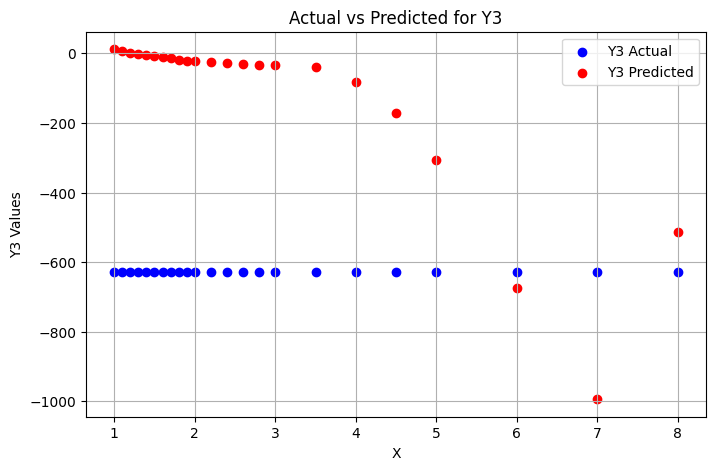

In [ ]:
def plot_actual_vs_predicted(col, model):
    with torch.no_grad():
        predictions = model(X_transformed).numpy()

    plt.figure(figsize=(8, 5))
    plt.scatter(df["X"], df[col], label=f"{col} Actual", color='blue')
    plt.scatter(df["X"], predictions, label=f"{col} Predicted", color='red')
    plt.xlabel("X")
    plt.ylabel(f"{col} Values")
    plt.title(f"Actual vs Predicted for {col}")
    plt.legend()
    plt.grid()
    plt.show()

for col, model in models.items():
    plot_actual_vs_predicted(col, model)
